In [ ]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Analysis of Policies based on Various Equity Factors

This analysis aims to understand how environmental policies, pollution burden, and demographic factors intersect within Title 1 schools serving economically disadvantaged students.

## Part I: Data Loading and Preparation

This section organizes the sample policies into a dataset for easier analysis. The granularity of the data is that each row represents a district, and each column represents a specific policy or factor.

Data cleaning:
- removing trailing spaces
- converting `str` types to `int` or `float`
- removing unnecessary words in headers

In [ ]:
data = pd.read_csv("Dataset.csv")
data.head()

,CDS Code,County,County Superintendent (CCESSA) Region,Geographical Lead Region,District Name,Abbreviation,District Type,Grade Levels,Number of Schools,High School Partner District if Elementary,...,Overall District Environmental Initiatives Score\nUp to 10 Points\n,District-Wide Environmental Coordinator Staff\n (Whole System Responsibilities)\n1 (Yes) 0 (No),District-Wide Environmental Campus (facilities and grounds) Staff\n1 (Yes) 0 (No),"District-Wide Environmental Curriculum, Community, and Culture Staff\n1 (Yes) 0 (No)",Site-Level Environmental Staff\n1 (Yes) 0 (No),Garden Coordinator (district or site) \n1 (Yes) 0 (No),District and Site-Level Environmental Staff\nLinks and Notes,Staffing Subtotal,Staffing Score,Environmental and Climate Action Score (20 points)
0,1611190000000,Alameda,4,4,Alameda Unified,AlaU,Unified School District,K-12,19,NaN,...,8.5,0,0,1,0.0,1,NaN,2,2,14.5
1,1611430000000,Alameda,4,4,Berkeley Unified,BerU,Unified School District,K-12,18,NaN,...,9.5,1,1,0,1.0,1,Sustainability Coordinator and Maintenance Man...,5,4,15.0
2,1611500000000,Alameda,4,4,Castro Valley Unified,CasVU,Unified School District,K-12,16,NaN,...,7.5,0,0,0,0.0,0,NaN,0,0,10.5
3,1611760000000,Alameda,4,4,Fremont Unified,FremU,Unified School District,TK-12,41,NaN,...,8.0,0,1,0,0.0,1,Instructional Coach for Climate Literacy,2,2,13.0
4,1611920000000,Alameda,4,4,Hayward Unified,HaywU,Unified School District,K-12,34,NaN,...,4.0,0,0,0,0.0,1,NaN,1,1,8.0


In [ ]:
# Cleaning
data.columns = [column.strip() for column in data.columns] # trailing space trim

data['Student Enrollment'] = data['Student Enrollment'].str.replace(',', '').astype(int) # str to int

data['% Unduplicated'] = data['% Unduplicated'].str.replace('%', '').astype(float) # str to float

data.rename(columns={'School Board Policy Commitments Score (out of 3)': 'Environmental Policy Score'}, inplace=True)

## Part II: Summary Statistics

This section computes summary statistics for key variables:
- Student Enrollment
- Average Pollution Burden
- % Unduplicated

In [ ]:
summary_stats = data[['Student Enrollment', 'Average Pollution Burden', '% Unduplicated']].describe()
print(summary_stats)

       Student Enrollment  Average Pollution Burden  % Unduplicated
count          250.000000                250.000000      250.000000
mean         17941.032000                 42.415663       61.203600
std          28041.279757                  8.761574       22.413257
min           5430.000000                 24.823600        5.700000
25%           8507.500000                 35.874200       44.250000
50%          12338.000000                 41.084900       65.550000
75%          20732.250000                 49.495150       80.050000
max         413556.000000                 64.229300       97.500000


## Part III: Comparative Analysis

This section analyzes the distribution of enviornmental policies across different categories:
- Enrollment Size
- Pollution Burden
- % Unduplicated

### Enrollment Size Analysis

Student Enrollment
Medium        9.094737
Large         8.988889
Very Large    7.984615
Name: Environmental Policies Count, dtype: float64


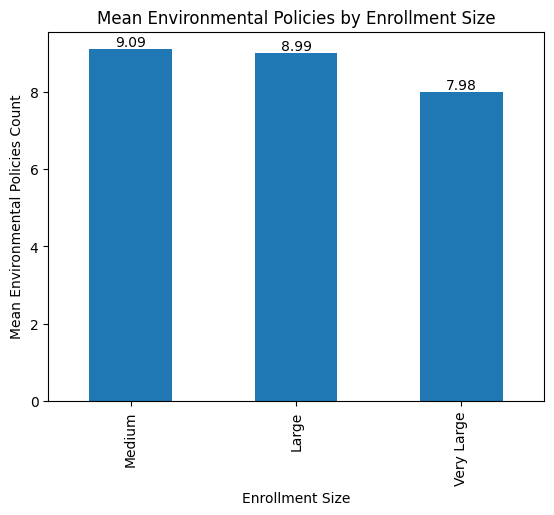

In [ ]:
data['Environmental Policies Count'] = data['Total Number of Policies Passed'] + data['Total Number of Regulations Passed']
enrollment_bins = pd.cut(data['Student Enrollment'], bins=[5000, 10000, 20000, float('inf')], labels=['Medium', 'Large', 'Very Large'])

enrollment_analysis = data.groupby(enrollment_bins)['Environmental Policies Count'].mean()

print(enrollment_analysis)

enrollment_analysis.plot(kind = 'bar', xlabel = 'Enrollment Size', ylabel = 'Mean Environmental Policies Count', title = 'Mean Environmental Policies by Enrollment Size')

for index, value in enumerate(enrollment_analysis):
  plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom')

plt.show()

Observations:
- There appears to be a slight decrease in the average count of environmental policies as enrollment size increases from "Medium" to "Very Large" districts.
- The difference in the average counts between these categories are relatively small, suggesting that enrollment size may not be the primary factor influencing the implementation of environmental policies.

### Pollution Burden Analysis

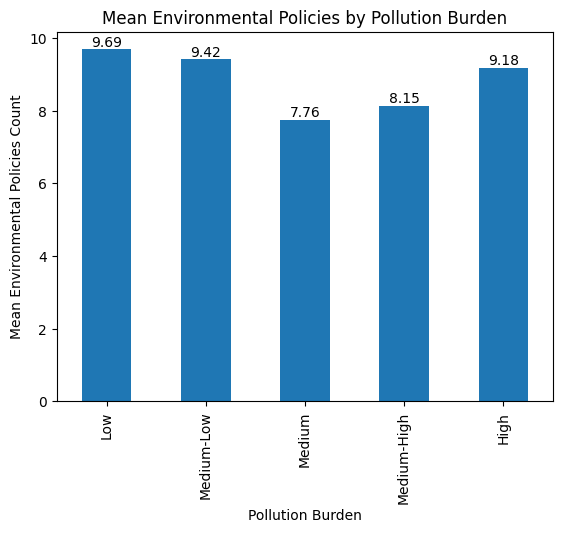

In [ ]:
pollution_bins = pd.cut(data['Average Pollution Burden'], bins = 5, labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'], retbins=False)
# print(pollution_bins)
pollution_analysis = data.groupby(pollution_bins)['Environmental Policies Count'].mean()

pollution_analysis.plot(kind = 'bar', xlabel = 'Pollution Burden', ylabel = 'Mean Environmental Policies Count', title = 'Mean Environmental Policies by Pollution Burden')

for index, value in enumerate(pollution_analysis):
  plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom')

plt.show()



Observations:
- The data suggests that districts with "Low" and "High" levels of average pollution burden have higher average counts of policies compared to distrcits with "Medium" levels of pollution burden.
- There is a slight decrease in the average count of environmental policies for districts with "Medium" levels of pollution burden compared to neighboring categories ("Medium-Low" and "Medium-High").
- This may suggest districts with extreme levels of pollution burden (either low or high) may prioritize environmental policy implementation more than districts with moderate levels of pollution burden.

### % Unduplicated Analysis

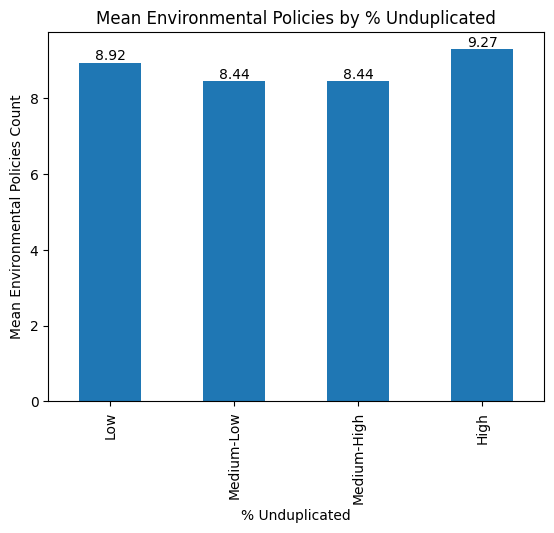

In [ ]:
unduplicated_bins = pd.qcut(data['% Unduplicated'], q = 4, labels = ['Low', 'Medium-Low', 'Medium-High', 'High'], retbins = False)
unduplicated_analysis = data.groupby(unduplicated_bins)['Environmental Policies Count'].mean()

unduplicated_analysis.plot(kind='bar', xlabel='% Unduplicated', ylabel='Mean Environmental Policies Count', title='Mean Environmental Policies by % Unduplicated')

for index, value in enumerate(unduplicated_analysis):
  plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom')

plt.show()

Observations:
- "High" districts in terms of % unduplicated students have the highest average count of environmental policies, indicating a potential correlation between student demographics and environmental policy implementation.
- the differences in average counts across the % unduplicated categories are relatively small

## Part IV: Checking for Potential Bias

This section checks for potential biases in the analysis by visualizing distributions in each key indicator group. Having even representations in the dataset helps avoid false interpretations and skewed diagrams.

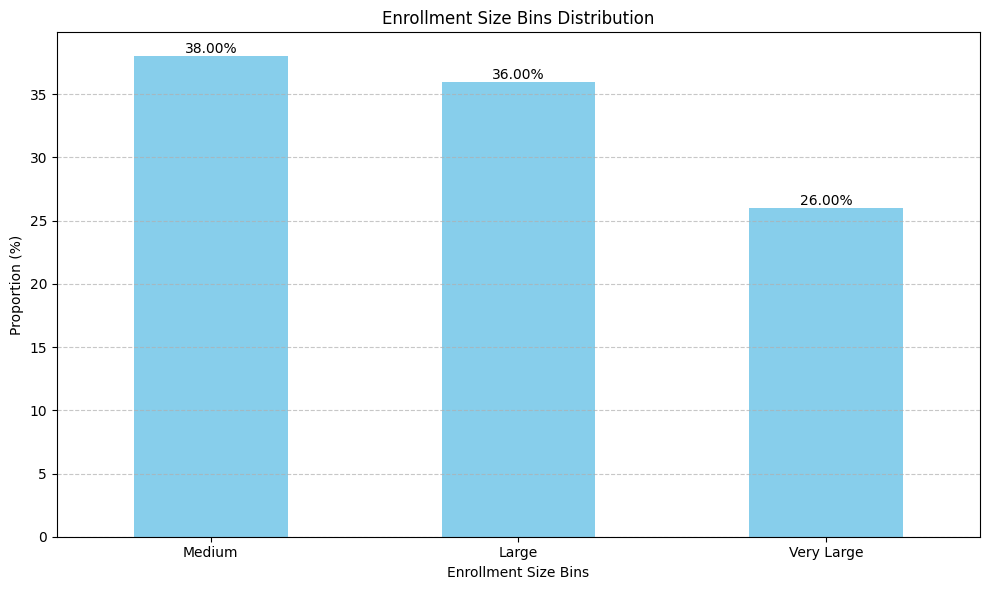

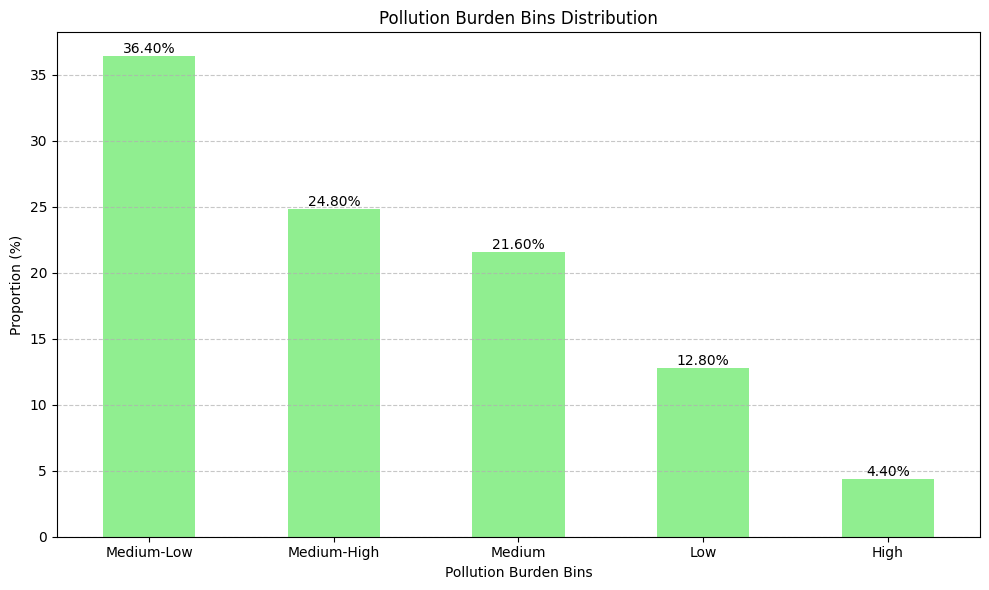

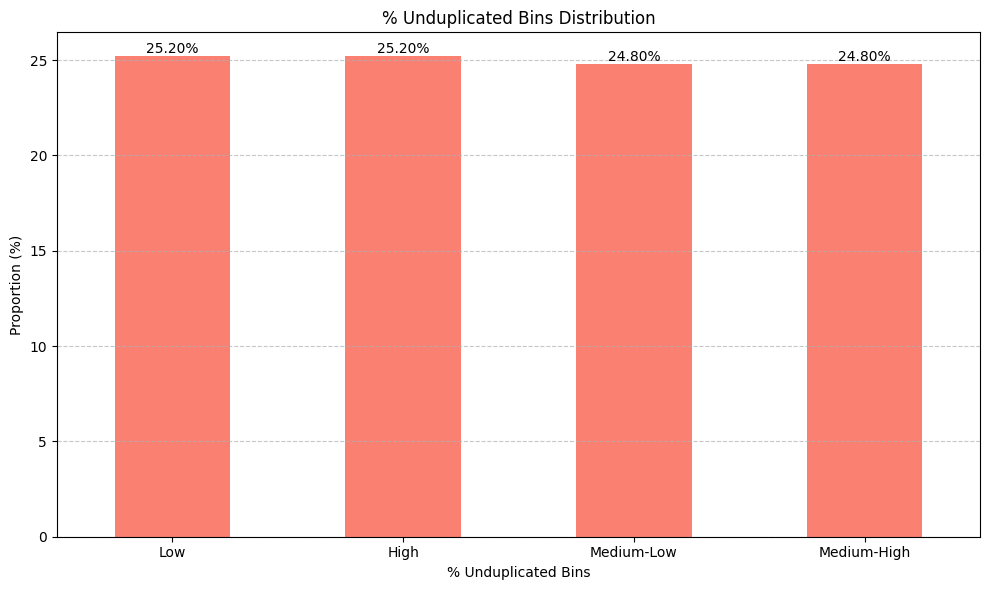

In [ ]:
enrollment_size_bins_distribution = enrollment_bins.value_counts(normalize=True) * 100

pollution_bins_distribution = pollution_bins.value_counts(normalize=True) * 100

unduplicated_bins_distribution = unduplicated_bins.value_counts(normalize=True) * 100

# helper
def annotate_bar_values(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# enrollment size
plt.figure(figsize=(10, 6))
ax1 = enrollment_size_bins_distribution.plot(kind='bar', color='skyblue')
plt.title('Enrollment Size Bins Distribution')
plt.xlabel('Enrollment Size Bins')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
annotate_bar_values(ax1)
plt.tight_layout()
plt.show()

# pollution burden
plt.figure(figsize=(10, 6))
ax2 = pollution_bins_distribution.plot(kind='bar', color='lightgreen')
plt.title('Pollution Burden Bins Distribution')
plt.xlabel('Pollution Burden Bins')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
annotate_bar_values(ax2)  # Annotate bar values
plt.tight_layout()
plt.show()

# % unduplicated
plt.figure(figsize=(10, 6))
ax3 = unduplicated_bins_distribution.plot(kind='bar', color='salmon')
plt.title('% Unduplicated Bins Distribution')
plt.xlabel('% Unduplicated Bins')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
annotate_bar_values(ax3)  # Annotate bar values
plt.tight_layout()
plt.show()

## Part V: Title 1 School Analysis
Title 1 schools, essential for supporting students from low-income families, are pivotal in addressing  disparities. This analysis investigates the distribution and characteristics of Title 1 schools concerning environmental policy scores, pollution burden, and demographic factors.

### By Environmental Policy Score

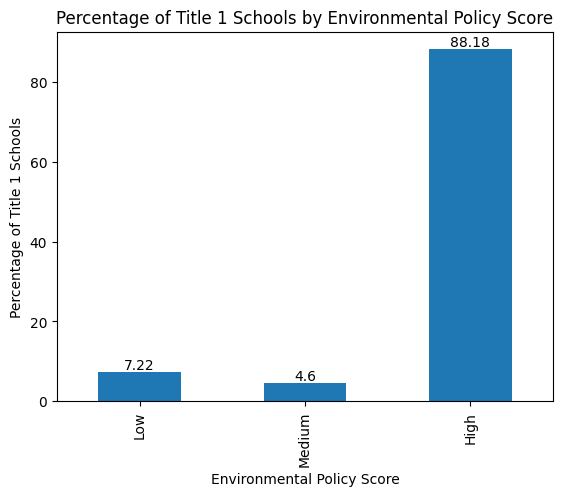

In [ ]:
districts_data = data[['District Name', 'Environmental Policy Score', 'Total Number of Policies Passed', 'Total Number of Regulations Passed', '# of Title 1 Schools']]

policy_score_groups = pd.cut(districts_data['Environmental Policy Score'], bins = 3, labels=['Low', 'Medium', 'High'])

total_title1_schools = districts_data['# of Title 1 Schools'].sum()

percentage_title1_by_policy = districts_data.groupby(policy_score_groups)['# of Title 1 Schools'].sum() / total_title1_schools * 100

percentage_title1_by_policy.plot(kind = 'bar', xlabel = 'Environmental Policy Score', ylabel = 'Percentage of Title 1 Schools', title = 'Percentage of Title 1 Schools by Environmental Policy Score')

for index, value in enumerate(percentage_title1_by_policy):
  plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom')

plt.show()

Observations:
- The majority of Title 1 schools are located within districts categorized as "High" in terms of environmental polic score.
- The distribution of Title 1 schools across different policy scores highlights potential inequities in environmental policy implementation.
- This may suggest with higher policy scores may be prioritizing resources and support for schools serving disadvantaged communities.
- This has potential for further analysis.

### By Average Pollution Burden

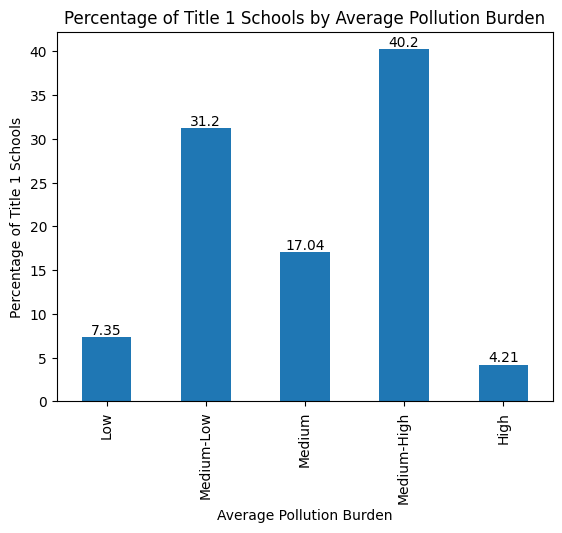

In [ ]:
districts_data = data[['District Name', 'Average Pollution Burden', '# of Title 1 Schools']]

percentage_title1_by_pollution = districts_data.groupby(pollution_bins)['# of Title 1 Schools'].sum() / total_title1_schools * 100

percentage_title1_by_pollution.plot(kind = 'bar', xlabel = 'Average Pollution Burden', ylabel = 'Percentage of Title 1 Schools', title = 'Percentage of Title 1 Schools by Average Pollution Burden')

for index, value in enumerate(percentage_title1_by_pollution):
  plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom')

plt.show()

Observations:
- Pollution burden varies widely across districts serving economically disadvantaged students.
- Most Title 1 schools are concentrated in "Medium-High" pollution burden range, indicating that schools with more economically disadvantaged students are more likely to be located in areas with higher levels of pollution burden.

### By % Unduplicated

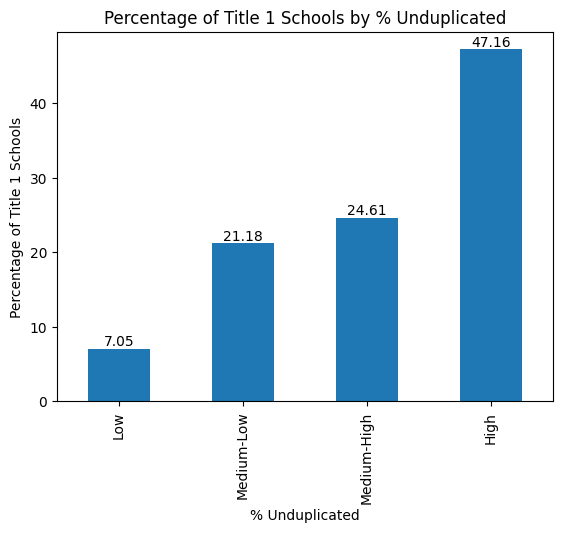

In [ ]:
districts_data = data[['District Name', '% Unduplicated', '# of Title 1 Schools']]

percentage_title1_by_unduplicated = districts_data.groupby(unduplicated_bins)['# of Title 1 Schools'].sum() / total_title1_schools * 100

percentage_title1_by_unduplicated.plot(kind = 'bar', xlabel = '% Unduplicated', ylabel = 'Percentage of Title 1 Schools', title = 'Percentage of Title 1 Schools by % Unduplicated')

for index, value in enumerate(percentage_title1_by_unduplicated):
  plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom')

plt.show()

Observations:
- The highest percentage of Title 1 schools are located within "High" percentage of unduplicated student districts.
- This may indicate that schools serving economically disadvantaged students, particularly those with a high portion of students from historically underrepresented groups, are more likely to be Title 1 Schools.
- This does not correlate directly with environmental indicators, but may suggest insight on considerations of demographic factors when addressing policy implementation.

## Part VI: Conclusions


Key Findings:

1. **Environmental Policy Implementation:** Our analysis revealed variations in environmental policy implementation across districts, with disparities evident in districts with different levels of pollution burden and percentages of unduplicated students. This suggests a need for targeted interventions to ensure equitable distribution of environmental resources and support.

2. **Title 1 School Distribution:** Title 1 schools, serving economically disadvantaged students, are disproportionately located in areas with higher pollution burden and among districts with a higher percentage of unduplicated students. This highlights potential environmental justice concerns and underscores the importance of addressing disparities in educational resources and opportunities.

3. **Correlation between Environmental Policies and Title 1 Schools:** Stronger environmental policies were associated with a lower proportion of Title 1 schools, suggesting that robust environmental policies may play a role in mitigating educational disparities by fostering healthier learning environments. This underscores the potential impact of environmental policy on promoting educational equity.

Implications:

- Policymakers should prioritize equitable distribution of environmental resources and support to schools serving economically disadvantaged communities to address environmental justice concerns and promote healthier learning environments.
  
- Educators and stakeholders should advocate for the integration of environmental equity considerations into education policy and practice, ensuring that all students have access to safe and conducive learning environments.

- Collaborative efforts between policymakers, educators, and community stakeholders are essential for addressing systemic inequalities and fostering inclusive educational environments that support the success and well-being of all students, regardless of their socio-economic background.

[Educator Visualization](https://docs.google.com/spreadsheets/d/1JWs9Viz5d340jAoGQ8ocVG_648q_B-PK/edit#gid=1426968976)